In [153]:
%load_ext autoreload
%autoreload 2
# !pip install ipywidgets
import sys
sys.path.append("/home/boittier/Documents/phd/ff_energy")

from ff_energy.structure import Structure
from ff_energy.job import Job
from ff_energy.jobmaker import get_structures_pdbs, JobMaker
from ff_energy.plot import plot_energy_MSE
from ff_energy.configmaker import *

from pathlib import Path
import pandas as pd

# s = Structure("/home/boittier/charmm/mix3/jobs/pdbs/mix0.pdb")

atom_types = {
              # ("LIG", "O"): "OG311",
              # ("LIG", "C"): "CG331",
              # ("LIG", "H1"): "HGP1",
              # ("LIG", "H2"): "HGA3",
              # ("LIG", "H3"): "HGA3",
              # ("LIG", "H4"): "HGA3",
              ("TIP3", "OH2"): "OT",
              ("TIP3", "H1"): "HT",
              ("TIP3", "H2"): "HT",
              # ("LIG", "O"): "OT",
              # ("LIG", "H1"): "HT",
              # ("LIG", "H"): "HT",
              # ("LIG", "H2"): "HT",
              }

def MakeJob(name, ConfigMaker, atom_types=atom_types):
    structures, pdbs = get_structures_pdbs(
        Path(ConfigMaker.pdbs),
        atom_types=atom_types
    ) 
    return JobMaker(name, pdbs, structures, ConfigMaker.make().__dict__)






The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
CMS = []
for system in system_names:
    for theory in THEORY.keys():
        print(system, theory)
        cm = ConfigMaker(theory, system, "pc")
        # print(cm.pdbs)
        # print(cm.make().kwargs)
        print(cm.atom_types)
        CMS.append(cm)

water_cluster pbe0dz
{('LIG', 'O'): 'OT', ('LIG', 'H1'): 'HT', ('LIG', 'H'): 'HT', ('LIG', 'H2'): 'HT'}
water_dimer pbe0dz
{('TIP3', 'OH2'): 'OT', ('TIP3', 'H1'): 'HT', ('TIP3', 'H2'): 'HT'}
methanol_cluster pbe0dz
{('LIG', 'O'): 'OG311', ('LIG', 'C'): 'CG331', ('LIG', 'H1'): 'HGP1', ('LIG', 'H2'): 'HGA3', ('LIG', 'H3'): 'HGA3', ('LIG', 'H4'): 'HGA3'}


In [35]:
jobmakers = []

for cms in CMS:
    job_dir = f"{cms.system_name}/{cms.theory_name}"
    print(job_dir)
    jm = MakeJob(job_dir, cms, 
                 atom_types=cms.atom_types)
    HOMEDIR = "/home/boittier/pcbach"
    jm.make_molpro(HOMEDIR)
    jobmakers.append(jm)
    


water_cluster/pbe0dz


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:10<00:00,  7.11it/s]


water_dimer/pbe0dz


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104/104 [00:00<00:00, 268.30it/s]


methanol_cluster/pbe0dz


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.00it/s]


In [20]:
from ff_energy.slurm import SlurmJobHandler

shj = SlurmJobHandler(max_jobs=100)
print("Running jobs: ", shj.get_running_jobs())

for jm in jobmakers:
    for js in jm.get_cluster_jobs(HOMEDIR):
        shj.add_job(js)

print("Jobs: ", len(jm.get_cluster_jobs(HOMEDIR)))

shj.submit_jobs()

Running jobs:  1
Jobs:  100
0/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test306/cluster/test306.sh to Slurm scheduler
1/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test324/cluster/test324.sh to Slurm scheduler
2/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test18/cluster/test18.sh to Slurm scheduler
3/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test105/cluster/test105.sh to Slurm scheduler
4/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test112/cluster/test112.sh to Slurm scheduler
5/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test459/cluster/test459.sh to Slurm scheduler
6/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test471/cluster/test471.sh to Slurm scheduler
7/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test370/cluster/test370.sh to Slurm scheduler
8/600 = submitted job /home/boittier/pcbach/water_cluster/pbe0dz/test233/cluster/test2

In [2]:
CMS = []
for system in system_names:
    for theory in THEORY.keys():
        for elec in ["pc", "mdcm"]:
            print(system, theory, elec)
            cm = ConfigMaker(theory, system, elec)
            # print(cm.pdbs)
            # print(cm.make().kwargs)
            print()
            CMS.append(cm)

water_cluster pbe0dz pc

water_cluster pbe0dz mdcm

water_dimer pbe0dz pc

water_dimer pbe0dz mdcm

methanol_cluster pbe0dz pc

methanol_cluster pbe0dz mdcm



In [45]:
# CMS[0].theory

In [46]:
# jobmakers = []
# for cms in CMS:
#     jm = MakeJob(f"{cms.system_name}/{cms.theory_name}", cms, 
#                  atom_types=cms.atom_types)
#     HOMEDIR = "/home/boittier/bhome"
#     # jm.make_charmm(HOMEDIR)
#     jm.make_coloumb(HOMEDIR,f"/home/boittier/pcbach/{cms.system_type}/{cms.theory_name}/""{}/monomers")
#     jobmakers.append(jm)

In [ ]:
jobmakers = []
for cms in CMS:
    jm = MakeJob(f"{cms.system_name}/{cms.theory_name}", cms, 
                 atom_types=cms.atom_types)
    HOMEDIR = "/home/boittier/bhome"
    PCBACH = "/home/boittier/pcbach"
    jm.gather_data(HOMEDIR, PCBACH, PCBACH)
    # jm.make_charmm(HOMEDIR)
    # jm.make_coloumb(HOMEDIR,
                    # f"/home/boittier/pcbach/{cms.system_type}/{cms.theory_name}/""{}/monomers")
    jobmakers.append(jm)

In [ ]:
jobmakers[0].data

In [152]:
mp = "/home/boittier/pcbach/meoh_clusters/pbe0dz/{}/monomers"
cp = "/home/boittier/pcbach/meoh_clusters/pbe0dz/{}/cluster"
JOBDIR = "meoh_clusters/pbe0dz"
HOMEDIR = "/home/boittier/homeb"

structures = []
output = []
for p in pdbs:
    s_path = PDBPATH / p
    s = Structure(s_path, atom_types=atom_types)
    s.set_2body()
    structures.append(s)
    ID = p.split(".")[0]
    j = Job(ID, f"{HOMEDIR}/{JOBDIR}/{ID}", s, kwargs=kwargs)
    o = j.gather_data(
        monomers_path=Path(mp.format(ID)),
        cluster_path=Path(cp.format(ID))
    )
    output.append(o)



NameError: name 'PDBPATH' is not defined

In [31]:
import pickle
def read_from_pickle(path):
    with open(path, 'rb') as file:
        try:
            while True:
                yield pickle.load(file)
        except EOFError:
            pass

In [94]:
output = []
for x in Path("pickles/water_cluster/pbe0_dz.mdcm").glob("*pickle"):
    a = read_from_pickle(x)
    a = next(a)
    output.append(a)

In [95]:
import itertools

cluster_df = pd.concat(list(itertools.chain([_["cluster"] for _ in output if len(_["cluster"]) > 0])))
# cluster_df

In [96]:
monomers_df = pd.concat([_["monomers_sum"] for _ in output])
# monomers_df#.describe()

In [97]:
chm_df = pd.concat([_["charmm"] for _ in output])
chm_df = chm_df.dropna()
# chm_df

In [98]:
ctot = pd.concat([_["coloumb_total"] for _ in output])
# ctot

In [99]:
data = pd.concat([ctot,chm_df,monomers_df,cluster_df],axis=1)

In [100]:
data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY
test467,-113.436686,test467,NaN,NaN,NaN,NaN,-1527.154217,test467,-1527.236629
test471,-127.463435,test471,NaN,NaN,NaN,NaN,-1527.144137,test471,-1527.242885
test117,-87.465907,test117,NaN,NaN,NaN,NaN,-1527.145615,test117,-1527.193103
test96,-163.434955,test96,NaN,NaN,NaN,NaN,-1527.131558,test96,-1527.246828
test186,-155.938399,test186,NaN,NaN,NaN,NaN,-1527.145607,test186,-1527.253079
...,...,...,...,...,...,...,...,...,...
test48,NaN,NaN,NaN,NaN,NaN,NaN,-1527.147549,test48,-1527.250885
test381,NaN,NaN,NaN,NaN,NaN,NaN,-1527.147167,test381,-1527.236541
test489,NaN,NaN,NaN,NaN,NaN,NaN,-1527.152482,test489,-1527.269339
test304,NaN,NaN,NaN,NaN,NaN,NaN,-1527.150985,test304,-1527.239633


In [101]:
def plot_ecol(data):
    data = data.dropna()
    data = data[data["ECOL"] < -50]
    fit = plot_energy_MSE(data, "ECOL", "ELEC", 
                    elec="ECOL", CMAP="plasma",
                   xlabel="Coulomb integral [kcal/mol]",
                   ylabel="CHM ELEC [kcal/mol]")

In [145]:
def plot_intE(data):
    data = data.dropna()
    # data = data[data["ECOL"] < -50]
    fit = plot_energy_MSE(data, "intE", "NBONDS", 
                    elec="ECOL", CMAP="viridis",
                   xlabel="intE [kcal/mol]",
                   ylabel="NBONDS [kcal/mol]")

In [117]:
from ff_energy.data import plot_ecol, Data

In [146]:

def plot_data(pk):
    d = Data(pk)
    d.data
    plot_ecol(d.data)
    plt.xlim(-180,0)
    plt.ylim(-180,0)
    plot_intE(d.data)
    # plt.xlim(-180,0)
    # plt.ylim(-180,0)
    return d

/home/boittier/Documents/phd/ff_energy/ff_energy/plot.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MSE"] = ERROR ** 2


,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY,intE,NBONDS
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,-1527.236629,-51.714066,-38.59477
test471,-127.463435,test471,22.27065,-61.37597,14.54395,test471,-1527.144137,test471,-1527.242885,-61.964509,-46.83202
test117,-87.465907,test117,24.19257,-38.84255,8.80992,test117,-1527.145615,test117,-1527.193103,-29.798988,-30.03263
test96,-163.434955,test96,25.18816,-78.76038,18.10955,test96,-1527.131558,test96,-1527.246828,-72.332202,-60.65083
test186,-155.938399,test186,22.60152,-75.61214,22.50911,test186,-1527.145607,test186,-1527.253079,-67.438908,-53.10303
...,...,...,...,...,...,...,...,...,...,...,...
test48,NaN,NaN,22.08270,-72.69812,20.01366,test48,-1527.147549,test48,-1527.250885,-64.843945,-52.68446
test381,NaN,NaN,23.41589,-68.49908,19.67678,test381,-1527.147167,test381,-1527.236541,-56.082083,-48.82230
test489,NaN,NaN,20.91705,-90.73360,32.25939,test489,-1527.152482,test489,-1527.269339,-73.327986,-58.47421
test304,NaN,NaN,21.68895,-69.20978,17.28253,test304,-1527.150985,test304,-1527.239633,-55.626955,-51.92725


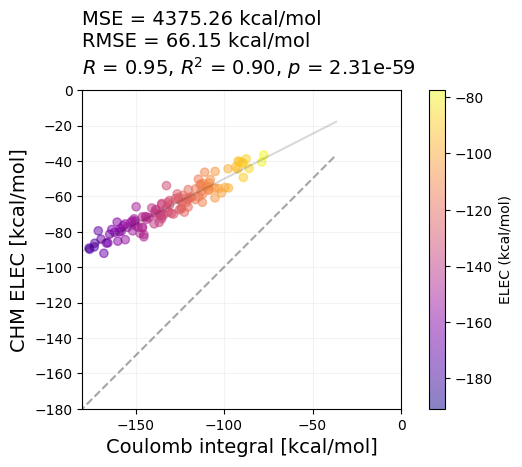

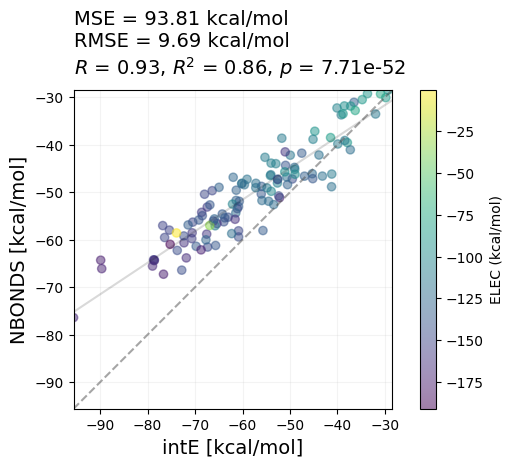

In [151]:
pk = "pickles/water_cluster/pbe0_dz.pc"

pbe0_dz_pc = plot_data(pk)
pbe0_dz_pc.data

/home/boittier/Documents/phd/ff_energy/ff_energy/plot.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MSE"] = ERROR ** 2


,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY,intE,NBONDS
test467,-113.436686,test467,21.39109,-81.32190,14.82881,test467,-1527.154217,test467,-1527.236629,-51.714066,-66.49309
test471,-127.463435,test471,21.36685,-93.42710,14.54395,test471,-1527.144137,test471,-1527.242885,-61.964509,-78.88315
test117,-87.465907,test117,23.93672,-59.12652,8.80992,test117,-1527.145615,test117,-1527.193103,-29.798988,-50.31660
test96,-163.434955,test96,24.31647,-119.88982,18.10955,test96,-1527.131558,test96,-1527.246828,-72.332202,-101.78027
test186,-155.938399,test186,21.62421,-115.09755,22.50911,test186,-1527.145607,test186,-1527.253079,-67.438908,-92.58844
...,...,...,...,...,...,...,...,...,...,...,...
test48,NaN,NaN,21.38249,-110.66179,20.01366,test48,-1527.147549,test48,-1527.250885,-64.843945,-90.64813
test381,NaN,NaN,22.34947,-104.26997,19.67678,test381,-1527.147167,test381,-1527.236541,-56.082083,-84.59319
test489,NaN,NaN,19.86517,-138.11558,32.25939,test489,-1527.152482,test489,-1527.269339,-73.327986,-105.85619
test304,NaN,NaN,20.88239,-105.35181,17.28253,test304,-1527.150985,test304,-1527.239633,-55.626955,-88.06928


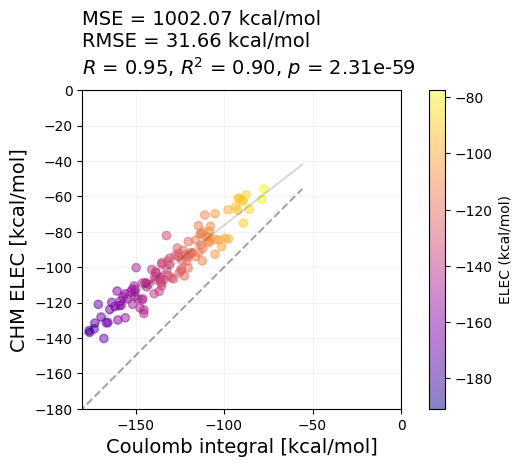

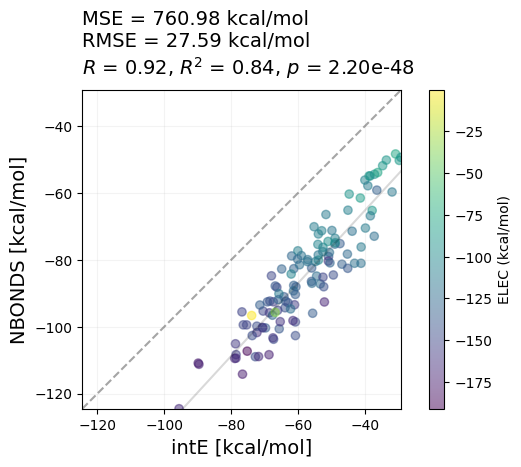

In [148]:
pk = "pickles/water_cluster/pbe0_dz.mdcm"

pbe0_dz_mdcm = plot_data(pk)
pbe0_dz_mdcm.data

In [149]:
pk = "pickles/methanol_cluster/meoh_pbe0dz.pc"
d = Data(pk)
d.data
# pbe0_dz_mdcm = plot_data(pk)

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY,intE,NBONDS
meoh0,-28.732352,meoh0,None,None,None,meoh0,-809.207191,meoh0,-809.233653,-16.605323,NaN
meoh12,-21.148105,meoh12,None,None,None,meoh12,-578.001693,meoh12,-578.030986,-18.381721,NaN
meoh11,-15.174838,meoh11,None,None,None,meoh11,-578.004005,meoh11,-578.020550,-10.382125,NaN
meoh14,-12.780557,meoh14,None,None,None,meoh14,-462.402668,meoh14,-462.416388,-8.609391,NaN
meoh13,-13.139943,meoh13,None,None,None,meoh13,-462.398740,meoh13,-462.414775,-10.062130,NaN
...,...,...,...,...,...,...,...,...,...,...,...
meoh96,NaN,NaN,None,None,None,meoh96,-924.793836,meoh96,-924.823086,-18.353911,NaN
meoh52,NaN,NaN,None,None,None,meoh52,-462.403193,meoh52,-462.413540,-6.492868,NaN
meoh76,NaN,NaN,None,None,None,meoh76,-577.996979,meoh76,-578.005824,-5.550314,NaN
meoh51,NaN,NaN,None,None,None,meoh51,-577.991247,meoh51,-578.012207,-13.152670,NaN


In [484]:
from ff_energy.cli import *
from ff_energy.structure import *
from ff_energy.potential import *

pc
pc
pc


In [457]:
CMS = load_all_theory()
jobs = charmm_jobs(CMS)
dists = [_.distances for _ in jobs[0].structures]

In [396]:
atom_keys = ["OG311", "CG331", "HGP1", "HGA3", "OT", "HT"]
atom_key_pairs = list(itertools.combinations_with_replacement(atom_keys, 2))

In [409]:
s = jobs[0].structures[0]
# s.atom_types[]
atom_types = list(set([s.atom_types[(a,b)] for a,b in zip(s.restypes, s.atomnames)]))
akp_indx = {akp:i for i, akp in enumerate(atom_key_pairs)}
atom_type_pairs = list(itertools.combinations_with_replacement(atom_types,2))
akp_indx
atom_type_pairs
atom_types

['OT', 'HT']

In [519]:
def LJ_(dists,epsilons=epsilons,rminhalfs=rminhalfs):
    E = 0
    for i,akp in enumerate(atom_type_pairs):
        e = np.sum(LJ_akp(dists[akp_indx[akp]],akp,
                          epsilons=epsilons,rminhalfs=rminhalfs))
        if len(dists[akp_indx[akp]]) != 0 :
            print(akp,e)
        E += e
    print(E)
    
def LJ_x(dists, x):
    s = {}
    e = {}
    for i,atp in enumerate(atom_types):
        s[atp] =  x[i]
        e[atp] = x[i+len(atom_types)]
    LJ_(dists,epsilons=e,rminhalfs=s)
    
def plot_intE(data):
    # data = data.dropna()
    # data = data[data["ECOL"] < -50]
    fit = plot_energy_MSE(data, "intE", "LJ_intE", 
                    elec="ECOL", CMAP="viridis",
                   xlabel="intE [kcal/mol]",
                   ylabel="NBONDS [kcal/mol]")

In [520]:
ff = FF(pbe0_dz_mdcm.data,dists,LJ,s)
args = [1.7682,0.2245,-0.1521,-0.0460]
np.sqrt(ff.get_loss(args))
ff.mse_df

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY,intE,NBONDS,LJ,LJ_intE,LJ_SE
test467,-113.436686,test467,21.39109,-81.32190,14.82881,test467,-1527.154217,test467,-1527.236629,-51.714066,-66.49309,14.617580,-66.704320,224.707721
test471,-127.463435,test471,21.36685,-93.42710,14.54395,test471,-1527.144137,test471,-1527.242885,-61.964509,-78.88315,13.769582,-79.657518,313.042541
test117,-87.465907,test117,23.93672,-59.12652,8.80992,test117,-1527.145615,test117,-1527.193103,-29.798988,-50.31660,22.642414,-36.484106,44.690808
test96,-163.434955,test96,24.31647,-119.88982,18.10955,test96,-1527.131558,test96,-1527.246828,-72.332202,-101.78027,22.925188,-96.964632,606.756619
test186,-155.938399,test186,21.62421,-115.09755,22.50911,test186,-1527.145607,test186,-1527.253079,-67.438908,-92.58844,19.954111,-95.143439,767.541010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test48,NaN,NaN,21.38249,-110.66179,20.01366,test48,-1527.147549,test48,-1527.250885,-64.843945,-90.64813,18.224853,-92.436937,761.373188
test381,NaN,NaN,22.34947,-104.26997,19.67678,test381,-1527.147167,test381,-1527.236541,-56.082083,-84.59319,10.235963,-94.034007,1440.348557
test489,NaN,NaN,19.86517,-138.11558,32.25939,test489,-1527.152482,test489,-1527.269339,-73.327986,-105.85619,5.397295,-132.718285,3527.207596
test304,NaN,NaN,20.88239,-105.35181,17.28253,test304,-1527.150985,test304,-1527.239633,-55.626955,-88.06928,11.961619,-93.390191,1426.061981


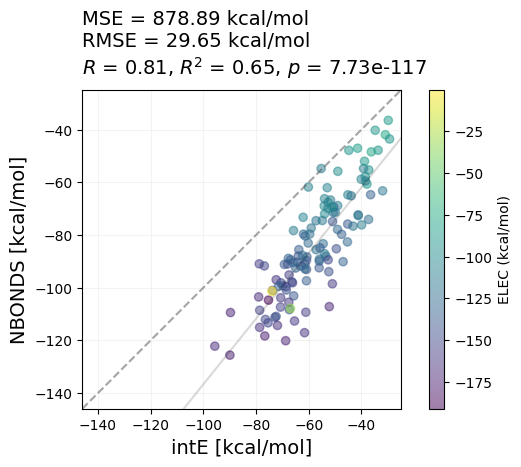

In [521]:
plot_intE(ff.mse_df) #.hist()

<AxesSubplot: >

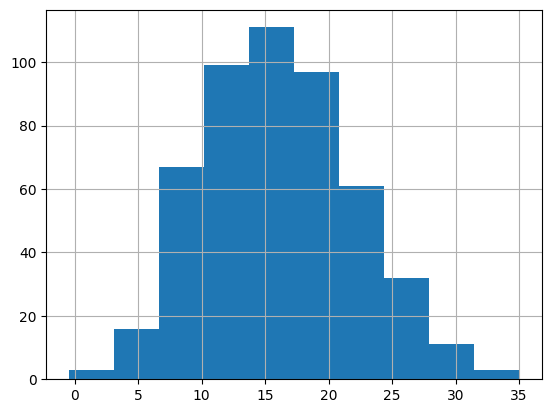

In [523]:
ff.mse_df["LJ"].hist()

In [ ]:

# ff.eval_func(args)

LJ_bound = (0.00001, 4.0)
ff.fit_repeat(10, bounds=[(LJ_bound)]*4)


Optimizing LJ parameters...
function: LJ
bounds: [(1e-05, 4.0), (1e-05, 4.0), (1e-05, 4.0), (1e-05, 4.0)]
maxfev: 10000
initial guess: [2.431153507917973, 1.517567454611547, 2.577005351615244, 3.6194990032700884]
final_loss_fn:  1980.160401097869
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1980.160401097869
             x: [ 1.000e-05  1.000e-05  4.000e+00  3.951e+00]
           nit: 51
          nfev: 152
 final_simplex: (array([[ 1.000e-05,  1.000e-05,  4.000e+00,  3.951e+00],
                       [ 1.000e-05,  1.000e-05,  4.000e+00,  3.951e+00],
                       ...,
                       [ 1.000e-05,  1.000e-05,  4.000e+00,  3.951e+00],
                       [ 1.000e-05,  1.000e-05,  4.000e+00,  3.951e+00]]), array([ 1.980e+03,  1.980e+03,  1.980e+03,  1.980e+03,
                        1.980e+03]))
Set optimized parameters to FF object, self.df["LJ"] is updated.
Optimizing LJ parameters...
function: LJ
boun

In [516]:
print(ff.mse_df["LJ_SE"].mean())
ff.mse_df

236.68766293533696


,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY,intE,NBONDS,LJ,LJ_intE,LJ_SE
test467,-113.436686,test467,21.39109,-81.32190,14.82881,test467,-1527.154217,test467,-1527.236629,-51.714066,-66.49309,40.645496,-40.676404,121.829986
test471,-127.463435,test471,21.36685,-93.42710,14.54395,test471,-1527.144137,test471,-1527.242885,-61.964509,-78.88315,36.207146,-57.219954,22.510802
test117,-87.465907,test117,23.93672,-59.12652,8.80992,test117,-1527.145615,test117,-1527.193103,-29.798988,-50.31660,51.953439,-7.173081,511.931686
test96,-163.434955,test96,24.31647,-119.88982,18.10955,test96,-1527.131558,test96,-1527.246828,-72.332202,-101.78027,50.123895,-69.765925,6.585779
test186,-155.938399,test186,21.62421,-115.09755,22.50911,test186,-1527.145607,test186,-1527.253079,-67.438908,-92.58844,45.179872,-69.917678,6.144297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test48,NaN,NaN,21.38249,-110.66179,20.01366,test48,-1527.147549,test48,-1527.250885,-64.843945,-90.64813,43.805747,-66.856043,4.048539
test381,NaN,NaN,22.34947,-104.26997,19.67678,test381,-1527.147167,test381,-1527.236541,-56.082083,-84.59319,27.915795,-76.354175,410.957712
test489,NaN,NaN,19.86517,-138.11558,32.25939,test489,-1527.152482,test489,-1527.269339,-73.327986,-105.85619,21.277810,-116.837770,1893.101270
test304,NaN,NaN,20.88239,-105.35181,17.28253,test304,-1527.150985,test304,-1527.239633,-55.626955,-88.06928,32.678547,-72.673263,290.576604


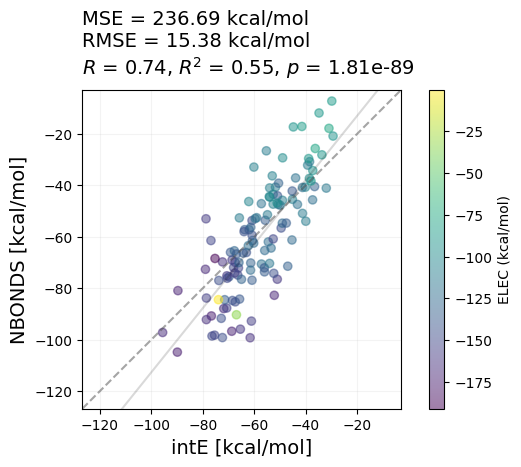

In [518]:
plot_intE(ff.mse_df) #.hist()

In [ ]:
ff.mse_df["LJ"].hist()

In [469]:
def plot_intE(data):
    data = data.dropna()
    # data = data[data["ECOL"] < -50]
    fit = plot_energy_MSE(data, "LJ", "intE", 
                    elec="ECOL", CMAP="viridis",
                   xlabel="intE [kcal/mol]",
                   ylabel="NBONDS [kcal/mol]")

In [470]:
LJ_x(dists, [1.7682,0.2245,-0.1521,-0.0460])

IndexError: list index out of range

In [453]:
len(dists)

21

In [291]:

all_dists = [_.distances for _ in jobs[0].structures]

In [292]:
# [[len(x) for x in _] for _ in all_dists_ext]

In [293]:
# [sum([len(x) == 0 for x in _]) for _ in all_dists_ext]

In [312]:
all_dists_ext = all_dists.copy()
# for i,_ in enumerate(all_dists_ext[:2]):
#      print(_)
test = all_dists_ext[0]
len(test)

21

In [305]:
max_size = max([ len(x) for x in test if not type(x) is int])
max_size

760

In [302]:
[ len(x) for x in test if not type(x) is int and x != 0.0]

[760, 0, 0, 0, 0, 190, 760]

In [325]:
test_pad = [0]*len(test)
for i,x in enumerate(test):
    if not type(x) is int and x != 0.0:
        x.extend([10**10,]*(max_size - len(x))) 
        test_pad[i] = x
    else:
        test_pad[i] = [10**10,]*(max_size)
test_pad = np.array(test_pad)

In [326]:
test_pad.shape

(21, 760)

In [454]:
LJ_(test_pad)

('OT', 'OT') -4.522109694272272e-07
('OT', 'HT') -0.56340244972262
('HT', 'HT') -0.0002293397661086115
-0.5636322416996981
